# Notebook 5: Random Forest | The galaxy-halo connection

---

### This notebook is inspired by and adapted from Delgado et al., 2022 [2022MNRAS.515.2733D]

Data for this work comes from the IllustrisTNG project: https://www.tng-project.org/data/

#### Please upload your completed notebook to Canvas as an .ipynb file
#### Title the file as: LastName_notebook5.ipynb

### Original work statement:

Please write your name and the names of your collaborators in this cell.

Please be sure to cite sources along the way as appropriate.

### Your name:
#### Collaborators:

You can edit this notebook directly by adding code and text cells as needed. As always, begin by importing the necessary packages.


---

## In this notebook:
You will be asked to find secondary dark matter halo parameters that help capture the galaxy-halo connection.

As we learned in class, we use the spatial distribution of galaxies to map the large-scale structure (LSS) but galaxies are biased tracers of the LSS. So we need to better understand the Glaxy-Halo Connection. What properties of halos help us understand how many galaxies reside in that halo?

We also learned that Halo Mass does most of work. Halo Mass is a strong predictor of the galaxy-halo connection, but it doesn't get us all the way there.

In this notebook, you will utilize various Random Forest ML algorithms to find secondary halo parameters that help get us better predict of the galaxy abundance insode dark matter halos.

### The HOD model:
As we learned in class, the Halo occupation distribution estimates the average number of galaxies that reside inside a dark matter halo as a function of its mass. There are three different equations for the HOD:
- one that predicts the average number of central galaxies
- one that predicts the average number of satelite galaxies
- and together they predict the average number of total galaxies in the halo

We will be emulating ALL THREE in this notebook.
1. We will first pridict the number of galaxies that reside inside each halo
2. We will evaluate the strength of the model by calculating a mock HOD (I provide the function) for our predictions and comparing with the "true" HOD.

# Problem 1: Data Exploration and Visualiztion
As always, we begin with exploring at the contents of our data and making some visualizations in order to help us determine what kind of ML tools would help us solve our problem.

## 1.1 Load the data in the file called Halo_data_group_2.csv

EACH ROW in the file is the data for ONE HALO. The file has 11 columns.

The columns are the following:
- First column: 'Mass_200m', Total mass of the halo in units of [$M_{\odot}/h$]


- Second column: 'Halo_pos_X', The X-coordinate of the halo in the simulation box in units of [Mpc/h]


- Third column: 'Halo_pos_Y', The Y-coordinate of the halo in the simulation box in units of [Mpc/h]


- Fourth column: 'Halo_pos_Z', The Z-coordinate of the halo in the simulation box in units of [Mpc/h]


- Fifth column: 'N_gals_total', Total galaxy abundance, the number of total galaxies that reside inside the halo


- Sixth column: 'N_centrals', Central galaxy abundance, the number of central galaxies that reside inside the halo


- Seventh column: 'N_satellites, Satellite galaxy abundance, the number of satellite galaxies that reside inside the halo


- Eigth column: 'Env_2.6', Local environment, the density around the halo out to a radius of 2.6 Mpc from its center


- Ninth column: 'Shear_2.6', how "squashed" or "stretched" the environment is at a radius of 2.6 Mpc from its center


- Tenth column: Concentration of the halo, describes the density distribution of the halo. Essentially, it tells how "centrally peaked" the density of the halo is.


- Eleventh column: 'V_max_Rad', the radius, or distance from halos center, at which maximum rotational velocity is achieved

Note: I suggest loading the file with pandas and then converting to numpy arrays just so you can read the file as a table with column names if you need them.

## 1.2 Visualize/explore your target variables:
As stated, in this notebook we will be using the halo properties as our training features. We will be attempting to predict the HOD with contributions of central galaxies, satellite galaxies, and total galaxies.  

i. Create histograms of N_tot_gals, N_central_gals and N_sat_gals.

ii. Use np.unique to get their classes and counts.

## 1.3 Visualize/Explore your features

### 1.3a
You notice that some of your features correspond to a distance from the center of each halo. Let's see what the environment around a halo might look like.

Since we also have the X and Y coordinates of every halo, while these aren't going to be training features, we can use this to make a scatter plot of every halo in the simulation.

* Make a scatter plot of the X and Y coordinates. You will need a LARGE figure in order to see the Large-scale Sturcture in our simulation. So I suggest using plt.figure(figsize=(50,50)) and make your marker='.'

* Do you notice any structure? What does the figure resemble??

### 1.3b
* now zoom into the above plot so that you can inspect a $(10\ {\rm Mpc/h})^2$ region (you can use plt.xlim and plt.ylim). Color code your scatter plot by log10 of halo mass (label the colorbar with the correct units). Make sure to reduce the size of your figure!

* What do you notice about the relation between position and mass?  

### 1.3c
Take a look at the summary of the secondary halo properties and see if they need to be normailzed. If so, normalize. REMEMBER WE WILL NEED OUR MASSES later, so if you normalize your masses, use np.log10 so we can unnormalize when we plot the HOD. (I unlog them for you in the HOD function)!!!

# Problem 2: Establishing that mass is a strong predictor
We learned that mass gets us most of the way to modeling the galaxy halo connection. So we will begin with mass as our ONLY training feature.

### As always, discuss the results from your cross-validation and your evaluation metric. Are they consistnent? Are the differnces statistically significant? How would you evaluate the success of your model?
## 2.1 Classification
Since we are predicting discrete values (we count objects in whole numbers), we are going to start by attempting a series of classification problems.

### 2.1.a Use a Random Forest (RF) Classifier to predict the number of CENTRAL galaxies using mass as the only traiing feature.
i.e. feature=mass, target=N_centrals

As a reminder, our procedure is:
- i. make a train/test split of your data, if we have a lot of data, you can make a 70%/30% split (hint: what do we do with an imbalanced dataset??)

- ii. visualize or use np.unique to check the distribution of your training and testing target values.

- iii. define a dictionary to hold the hyperparameters you want to try

- iv. define a KFold cross-validation generator (if this is a highly imbalanced dataset which one might help us out? KFold or StratifiedKFold?)

- v. perfrom the hyperparameter grid search for the best hyperparameters. What scoring metric will you use?? You may want to assign variables to hold the best parameters for easy passing to your model.

- vi. define your model (create a variable to hold your model)
- vii. fit your model

- viii. make predictions with your model (create a variable to hold your predictions)

- ix. evaluate your model with a scoring metric

- x. evaluate your model visually (in your confusion matrix, set normalize='pred')

### IMPORTANT: set the same random seed to all your test_train_split functions and use a 70/30 split for everything (set test_size=0.3 in your train-test-split() function). You will need these arrays to be consistent for the plotting to work.

### 2.1.b Now predict the number of Satellites using a RF classifier

### 2.1.c Now predict the total galaxies using a RF classifier

## 2.2 Evaluation of Classification model against mock HOD
You will need to import: from scipy import stats

THE FOLLWING FUNCTIONS ARE FOR YOU TO CALCULATE THE MOCK HOD!
You don't need to do anything to them other than understand what they do and pass your variables to them.

In [ ]:
### PLEASE DO NOT CHANGE THIS CELL!!

### first we make the bins to hold the halo masses.
### this will be used in our evaluation plots
# number of bin edges
n_bins = 15
# bin edges
bins = np.logspace(12.,14.5,n_bins)
# bin centers
bin_cents = 0.5*(bins[1:]+bins[:-1])

def mock_hod(test_set_masses, predicted_gal_counts):
    '''
    This function calculates the average number of galaxies per halo mass bin.

    parameters:
    ----------
    test_set_masses: (array, the true masses from the test set)
    predicted_gal_counts: (array, the RF predicted galaxy counts)

    returns:
    --------
    average number of galaxies per halo mass bin: (array)
    '''
    test_set_masses = 10**test_set_masses #unlog the masses
    #for a mock HOD we want the average number of galaxies per mass bin
    hist_hod, edges, bin_number  = stats.binned_statistic(test_set_masses.reshape(-1),\
                                                          predicted_gal_counts,\
                                                          statistic='mean', bins=bins)

    return hist_hod

### 2.2.a You bow have predictions for your N_centrals, N_satellites and N_total.
You will calculate mock hod values for each of them.

Create three variables to hold the outputs from the mock_HOD() functions. One for each of your predictions. Pass the masses in your test set and the predicted galaxy counts to the function (X_test from any of your test seets will will work if you used the same reandom seed and set test_size=0.3 in your train_test_split() function.

This will calculate the average number of galaxies per halo mass bin.

FOR EXAMPLE:

centrals_hod_classification = mock_HOD(X_test_centrals, y_pred_centrals)

### 2.2.b make three "true" mock hods just like you did above but now using your X_test and y_test arrays.

FOR EXAMPLE:

centrals_hod_classification = mock_HOD(X_test_centrals, y_test_centrals)

### 2.2.c plot all six HODs together on the same figure.

The variable bin_cents, which is provided, is your array of mass bin centers.



Your HOD arrays are the y-values of the plots.

You will need:
- label your lines something like "TNG centrals", "TNG satellites", "TNG total" "RF centrals", "RF satellites", "RF totals".
- make the RF prediction lines "dashed"
- label your x-axis "halo mass" with units in [M_solar]
- label your y-axis "average number of galaxies",  unitless
- make your x-axis AND y-axis in logscale
- title your figure "mass-only model"

FOR EXAMPLE:

plt.plot(bin_cents, centrals_hod_classification, linestyle='--', label='RF centrals')

etc.

** Sanity Check: Your three TNG lines should look like this:

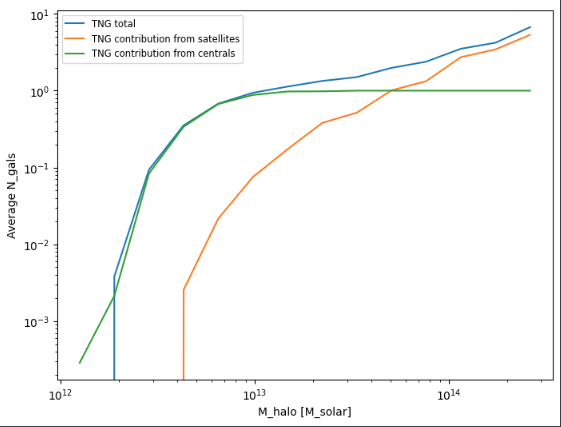

#### Question:
How well did the RF Classifier capture the three models of the HOD trained only on mass? Did masss get us most of the way there?

## 2.3  Regression

You will now try a Random Forest Regresssor to establish that mass is a strong predictor of the galaxy-halo connection.

### 2.3.a. Predict the Total number of galaxies, N_total, with a Random Forest Regressor, using mass as your only training feature.

Don't forget to:
- update your grid-search parameters
- update your scoring metrics

### 2.4 calculate the mock HOD for your regression model and include it in your mass-only HOD plot.
label that line "RF Regression"
#### Question:
How does the RF regressor compare to the RF classifier?

# Problem 3. Establishing that the mass-only model needs improvement.

One way we can establish that the mass-only model can be better, is to look at how much of the standard deviation of the galaxy abundance the RF was able to capture.

THE FOLLOWING FUNCTION IS FOR YOU TO EVALUATE YOUR HOD MODELS

In [ ]:
### PLEASE DO NOT CHANGE THIS CELL

def evaluate_spread(test_set_masses, true_gal_counts, predicted_gal_counts):
    '''
    This function calculates the fraction of correct standard deviation of
    galaxies per halo mass bin predicted by the RF regressor.

    parameters:
    ----------
    test_set_masses: (array, the true masses from the test set)
    true_gal_counts: (array, the true galaxy counts from the test set)
    predicted_gal_counts: (array, the RF predicted galaxy counts)

    returns:
    -------
    the fractional comparison of predicted standard deviation/true standard deviation (array)
    '''
    test_set_masses = 10**test_set_masses #unlog the masses
    #We want to see did the RF capture the correct standard deviation in the mass mins

    #the true spread for comparison
    true , e, b = stats.binned_statistic(test_set_masses, true_gal_counts,\
                                                          statistic='std', bins=bins)

    #the predicted spread
    hist_hod, edges, bin_number  = stats.binned_statistic(test_set_masses, predicted_gal_counts,\
                                                          statistic='std', bins=bins)
    #a way for us to visually compare the two
    return (hist_hod+1)/(true+1)


Similar to what you did before, you will creat an array to plot. But this time pass your test set masses (X_test), your true galaxy counts fro, the test set (Y_test) and your regression predictions (y_pred_regression) to the evaluate_scatter() function.

NOTE: Your masses must be in a 1-D array, so if it is a 2-D array, you will need to use .reshape(-1)

And make an array for the TNG true scatter (this array should be all equal to 1)

Plot these two lines together.
The variable bin_cents, are again your x-values.

Your evaluate_spread arrays are the y-values of the plots.

You will need:

- label your lines something like "TNG true", "RF mass"
- make the RF prediction lines "dashed"
- make your RF prediction with mass color green! This will need to stay the same color for the remainder of the notebook!
- label your x-axis "halo mass" with units in [M_solar]
- label your y-axis "standard deviation of N_galaxies", unitless
- make only your x-axis in logscale
title your figure "comparison of standard deviation
FOR EXAMPLE:

plt.plot(bin_cents, mass_only_regression_spred, linestyle='--', c='g', label='RF mass')

etc.

### Question:
About how far is your RF mass-only line away from your TNG true line? (Yes, your TNG true line should be a straight line at y=1) How much of the spread, or the standard deviation of galaxy abundance as a function of halo mass is the RF capturing?

# Problem 4. Improving the HOD with secondary halo parameters. (Chellenging!!)

## If you made it this far, congratulations! That took a lot of scientifc thinking and a good handle on the RF.

## And now for the challenge:
Incorporate other halo properties IN ADDITION TO MASS using a RF regression model. You may try one to as many models as you like.

You will essentially be adding features to your regression model.

Repeat the necessary steps and evaluate against the standard deviation (evaluate_spread) plot.

As you add lines to your plot, label them by the properties you used. i.e (label='RF mass, env, etc')

#### VERY IMPORTANT: save your X_test_array of masses to pass to the evaluate_spread() function. remeber, our evaluation relies on binning by halo mass so we must keep our arrays well organized and labeled!

# Problem 5. Analysis
Analyze the results from your best model. What physical properties of your features may have contributed to the improvemnet? In other words, what information do these features provide for the model?